In [1]:
%matplotlib inline

import cPickle
from imdb import IMDb
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path

PROCESSQUEUEPATH = 'vistvfinales.p'

In [2]:
series_data = {'24': {'id': '0285331'},
               '30 Rock': {'id': '0496424'},
               '90210 (2008-2013)': {'id': '1225901'},
               'All in the Family': {'id': '0066626'},
               'Alias': {'id': '0285333'},
               'Angel': {'id': '0162065'},
               'Avatar: The Last Airbender': {'id': '0417299'},
               'Battlestar Galactica (1978-1979)': {'id': '0076984'},
               'Battlestar Galactica (2004-2009)': {'id': '0407362'},
               'Band of Brothers': {'id': '0185906'},
               'Baywatch': {'id': '0096542'},
               'Beverly Hills, 90210 (1990-2000)': {'id': '0098749'},
               'Boardwalk Empire': {'id': '0979432'},
               'Boy Meets World': {'id': '0105958'},
               'Breaking Bad': {'id': '0903747'},
               'Brothers & Sisters': {'id': '0758737'},
               'Buffy the Vampire Slayer': {'id': '0118276'},
               'Burn Notice': {'id': '0810788'},
               'Charmed': {'id': '0158552'},
               'Cheers': {'id': '0083399'},
               'Chuck': {'id': '0934814'},
               'Dallas (1978-1991)': {'id': '0077000'},
               'Deadwood': {'id': '0348914'},
               'Desperate Housewives': {'id': '0410975'},
               'Dexter': {'id': '0773262'},
               'Dragon Ball Z': {'id': '0214341'},
               'Entourage': {'id': '0387199'},
               'ER': {'id': '0108757'},
               'Everybody Loves Raymond': {'id': '0115167'},
               'Family Ties': {'id': '0083413'},
               'Flashforward': {'id': '1441135'},
               'Firefly': {'id': '0303461'},
               'Frasier': {'id': '0106004'},
               'Friends': {'id': '0108778'},
               'Fringe': {'id': '1119644'},
               'Futurama': {'id': '0149460'},
               'Gilmore Girls': {'id': '0238784'},
               'Glee': {'id': '1327801'},
               'Heroes': {'id': '0813715'},
               'Home Improvement': {'id': '0101120'},
               'House M.D.': {'id': '0412142'},
               'How I Met Your Mother': {'id': '0460649'},
               'Jericho': {'id': '0805663'},
               'Justified': {'id': '1489428'},
               'Lois & Clark: The New Adventures of Superman': {'id': '0106057'},
               'Lost': {'id': '0411008'},
               'M*A*S*H': {'id': '0068098'},
               'Mad Men': {'id': '0804503'},
               'Magnum, P.I.': {'id': '0080240'},
               'Malcolm in the Middle': {'id': '0212671'},
               'Married with Children': {'id': '0092400'},
               'Merlin': {'id': '1199099'},
               'Misfits': {'id': '1548850'},
               'Monk': {'id': '0312172'},
               'Mr. Bean': {'id': '0096657'},
               'My Name is Earl': {'id': '0460091'},
               'Newhart': {'id': '0083455'},
               'Nip/Tuck': {'id': '0361217'},
               'One Tree Hill': {'id': '0368530'},
               'Oz': {'id': '0118421'},
               'Parks and Recreation': {'id': '1266020'},
               'Prison Break': {'id': '0455275'},
               'Psych': {'id': '0491738'},
               'Revolution': {'id': '2070791'},
               'Rome': {'id': '0384766'},
               'Roseanne': {'id': '0094540'},
               'Scrubs (S8 finale)': {'id': '0285403'},
               'Scrubs (S9 finale)': {'id': '0285403'},
               'Seinfeld': {'id': '0098904'},
               'Sex and the City': {'id': '0159206'},
               'Six Feet Under': {'id': '0248654'},
               'Skins': {'id': '0840196'},
               'Smallville': {'id': '0279600'},
               'Sons of Anarchy': {'id': '1124373'},
               'Spartacus: War of the Damned': {'id': '1442449'},
               'Star Trek: Deep Space Nine': {'id': '0106145'},
               'Star Trek: Enterprise': {'id': '0244365'},
               'Star Trek: The Next Generation': {'id': '0092455'},
               'Star Trek: Voyager': {'id': '0112178'},
               'Stargate SG-1': {'id': '0118480'},
               'Stargate: Atlantis': {'id': '0374455'},
               'Stargate: Universe': {'id': '1286039'},
               'That \'70s Show': {'id': '0165598'},
               'The Cosby Show': {'id': '0086687'},
               'The Following': {'id': '2071645'},
               'The Fresh Prince of Bel-Air': {'id': '0098800'},
               'The Fugitive': {'id': '0056757'},
               'The IT Crowd': {'id': '0487831'},
               'The Killing': {'id': '1637727'},
               'The King of Queens': {'id': '0165581'},
               'The L Word': {'id': '0330251'},
               'The Newsroom': {'id': '1870479'},
               'The Mentalist': {'id': '1196946'},
               'The O.C.': {'id': '0362359'},
               'The Office (UK)': {'id': '0290978'},
               'The Office (US)': {'id': '0386676'},
               'The Pacific': {'id': '0374463'},
               'The Shield': {'id': '0286486'},
               'The Sopranos': {'id': '0141842'},
               'The West Wing': {'id': '0200276'},
               'The Wire': {'id': '0306414'},
               'The X Files': {'id': '0106179'},
               'True Blood': {'id': '0844441'},
               'Two and a Half Men': {'id': '0369179'},
               'Veronica Mars': {'id': '0412253'},
               'Weeds': {'id': '0439100'},
               'White Collar': {'id': '1358522'}}
if os.path.isfile(PROCESSQUEUEPATH):
    # Delete the PROCESSQUEUEPATH file if you want to redownload all of the rating scores
    loaded_list = cPickle.load(open(PROCESSQUEUEPATH, 'rb'))
    series_data.update(loaded_list)

print '{0} entries to be plotted'.format(len(series_data))

107 entries to be plotted


In [3]:
def sortedSeasons(m):
    """Return a sorted list of seasons of the given series."""
    seasons = m.get('episodes', {}).keys()
    seasons.sort()
    return seasons

def sortedEpisodes(m, season=None):
    """Return a sorted list of episodes of the given series,
    considering only the specified season(s) (every season, if None)."""
    episodes = []
    seasons = season
    if season is None:
        seasons = sortedSeasons(m)
    else:
        if not isinstance(season, (tuple, list)):
            seasons = [season]
    for s in seasons:
        eps_indx = m.get('episodes', {}).get(s, {}).keys()
        eps_indx.sort()
        for e in eps_indx:
            episodes.append(m['episodes'][s][e])
    return episodes

In [4]:
# Start up IMDbPY
i = IMDb()

# Load the rating information if it was not already processed
for series_name, series in series_data.iteritems():
    print 'Processing {0}'.format(series_name)
    if not 'rating_series' in series:
        m = i.get_movie(series['id'])
        series['rating_series'] = m['rating']
    if not 'rating_finalepisode' in series:
        m = i.get_movie(series['id'])
        i.update(m, 'episodes')
        if series_name == 'Psych':
            # Last episode on IMDb is a wrap episode, not the finale
            lastEpisode = sortedEpisodes(m, season=sortedSeasons(m)[-1])[-2]
        elif series_name == 'Scrubs (S8 finale)':
            # Lots of Scrubs fans believe that Season 8's finale was the real one, so include both
            lastEpisode = sortedEpisodes(m, season=sortedSeasons(m)[-2])[-1]
        else:
            lastEpisode = sortedEpisodes(m, season=sortedSeasons(m)[-1])[-1]
        i.update(lastEpisode, 'main')
        series['rating_finalepisode'] = lastEpisode['rating']
    cPickle.dump(series_data, open(PROCESSQUEUEPATH, 'wb'))

Processing Smallville
Processing Desperate Housewives
Processing The IT Crowd
Processing Boy Meets World
Processing Frasier
Processing 24
Processing Baywatch
Processing The King of Queens
Processing Everybody Loves Raymond
Processing Boardwalk Empire
Processing Weeds
Processing Veronica Mars
Processing Dallas (1978-1991)
Processing Stargate: Atlantis
Processing Prison Break
Processing Fringe
Processing Monk
Processing Rome
Processing Oz
Processing The West Wing
Processing Star Trek: Enterprise
Processing Entourage
Processing Angel
Processing The Mentalist
Processing Skins
Processing Seinfeld
Processing The Wire
Processing Married with Children
Processing 90210 (2008-2013)
Processing Glee
Processing Avatar: The Last Airbender
Processing How I Met Your Mother
Processing Firefly
Processing Home Improvement
Processing Futurama
Processing Stargate SG-1
Processing 30 Rock
Processing Spartacus: War of the Damned
Processing Star Trek: Deep Space Nine
Processing The X Files
Processing Battlesta

In [5]:
def generate_plot(list_in):
    ## Plot the data
    labels = []
    yVal = 0
    fig = plt.figure(num=1, figsize=(9, 14))
    ax = plt.gca()
    ## For each show, add the name to the list of y labels, create an arrow from the average rating
    ## to the rating of the finale (colored red if the finale was lower than the average and green
    ## if it was higher), and plot a black circle for the average rating.
    for currentShow in list_in:
        labels.append(currentShow['name'])
        yVal=yVal+1
        ax.plot([0, 10], [yVal, yVal], 'k', alpha = 0.05)
        if currentShow['rating_finalepisode'] > currentShow['rating_series']:
            ax.arrow(currentShow['rating_series'],yVal,
                      currentShow['rating_finalepisode']-currentShow['rating_series'],0,color='#4575b4',
                      head_width=0.4, head_length=0.125,length_includes_head=True)
        elif currentShow['rating_finalepisode'] < currentShow['rating_series']:
            ax.arrow(currentShow['rating_series'],yVal,
                      -(currentShow['rating_series']-currentShow['rating_finalepisode']),0,color='#d73027',
                      head_width=0.4, head_length=0.125,length_includes_head=True)
        ax.plot(currentShow['rating_series'], yVal, 'ok', markersize=4)
    ## Set the axis parameters
    ax.axis([4.0,10.0,0.0,yVal+1.0])
    ax.set_aspect('auto')
    ax.set_yticks(range(1,len(labels)+1))
    ax.set_yticklabels(labels, fontsize=8, va='center')
    plt.subplots_adjust(left=0.5, bottom=0.025, right=0.99, top=1)

    # Explanatory text
    fig.text(0.005, 0.99, 'IMDB.com ratings of\n'
                          'television series finales\n'
                          'relative to their average\n'
                          'episode rating\n',
             fontsize=12, color='black', weight='bold', ha='left', va='top', alpha=1, transform=ax.transAxes)
    fig.text(0.005, 0.84, 'Black Dot -> Average episode rating\n'
                          'Blue -> Finale rated higher than average\n'
                          'Red -> Finale rated lower than average',
             fontsize=8, color='black', weight='bold', ha='left', va='top', alpha=1, transform=ax.transAxes)
    # Add some additional info
    fig.text(0.005, 0.005, 'MIT License - https://github.com/OrganicIrradiation/vistvfinales',
             fontsize=6, color='black', ha='left', va='bottom', alpha=0.5)
    return [fig, ax]

In [6]:
# Ugly hack to turn the data into a list that can be sorted
data_list = []
for k, v in series_data.items():
    dict_to_add = v
    dict_to_add.update({'name': k})
    data_list.append(dict_to_add)

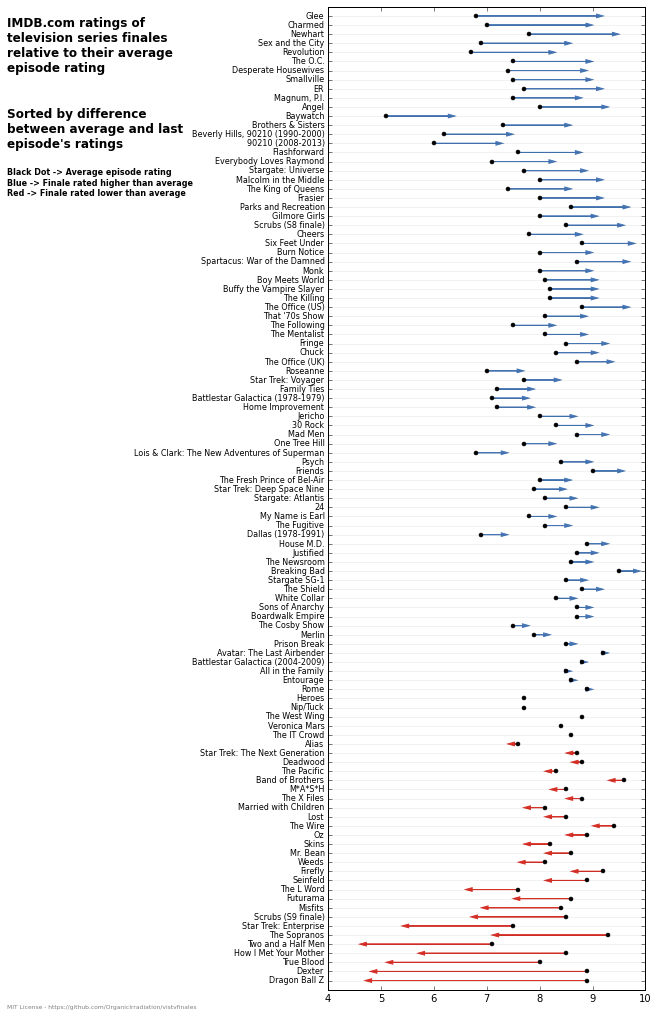

In [7]:
## Sort the data by difference between average and last episode
data_list = sorted(data_list, key=lambda k: (k['rating_finalepisode']-k['rating_series']))
[fig, ax] = generate_plot(data_list)
fig.text(0.005, 0.90, 'Sorted by difference\nbetween average and last\nepisode\'s ratings',
         fontsize=12, color='black', weight='bold', ha='left', va='top', alpha=1, transform=ax.transAxes)
plt.show()
fig.savefig('images/img_difference.png', dpi=300)

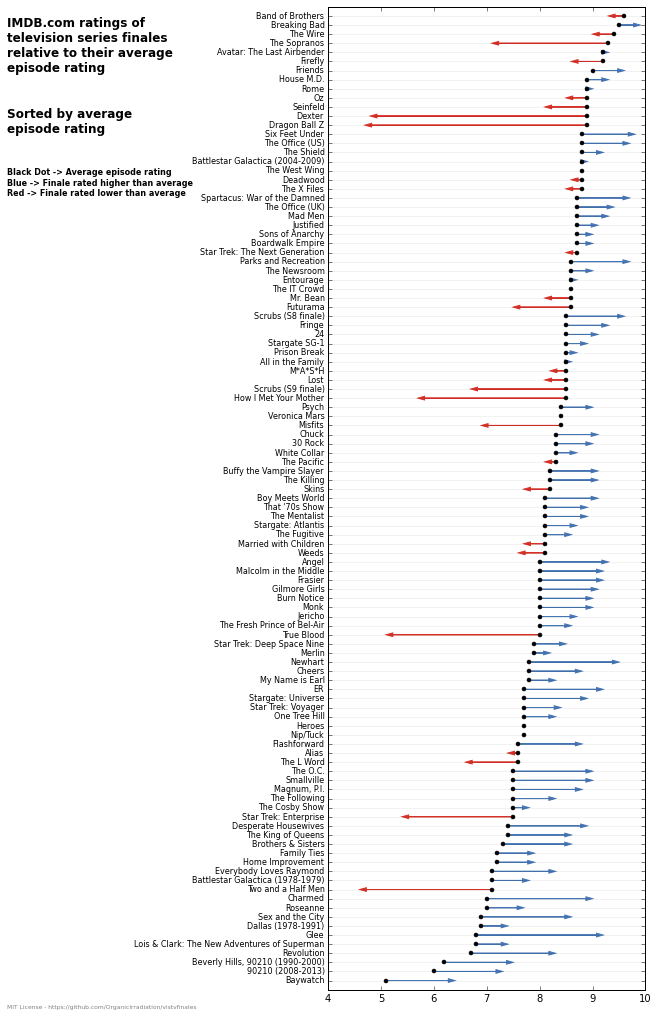

In [8]:
## Sort the data by average rating
data_list = sorted(data_list, key=lambda k: k['rating_series'])
[fig, ax] = generate_plot(data_list)
fig.text(0.005, 0.90, 'Sorted by average\nepisode rating',
         fontsize=12, color='black', weight='bold', ha='left', va='top', alpha=1, transform=ax.transAxes)
plt.show()
fig.savefig('images/img_averagerating.png', dpi=300)

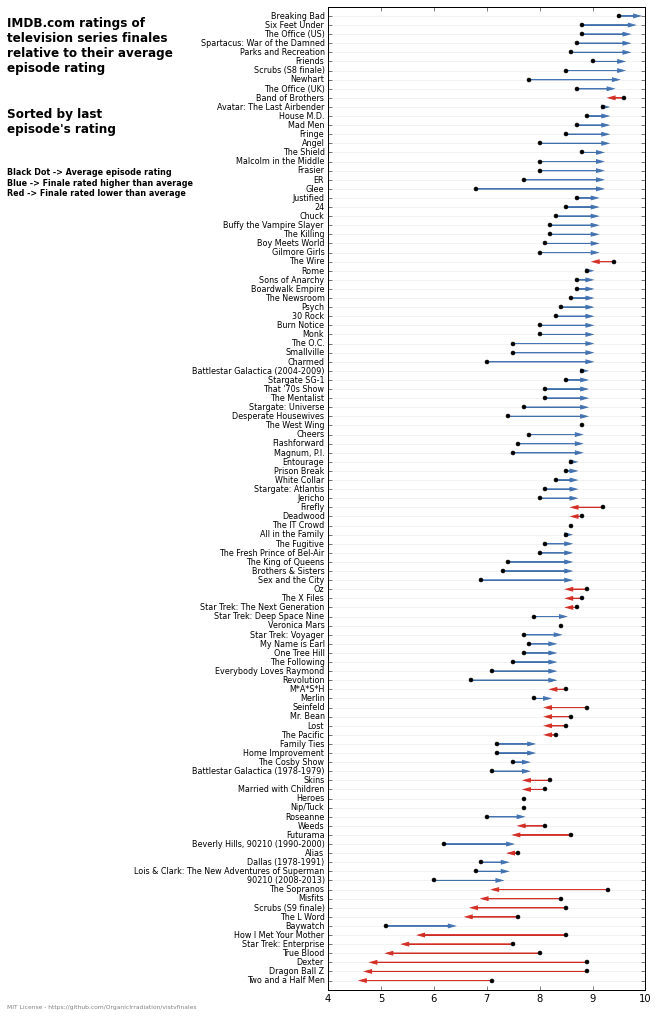

In [9]:
## Sort the data by last episode
data_list = sorted(data_list, key=lambda k: k['rating_finalepisode'])
[fig, ax] = generate_plot(data_list)
fig.text(0.005, 0.90, 'Sorted by last\nepisode\'s rating',
         fontsize=12, color='black', weight='bold', ha='left', va='top', alpha=1, transform=ax.transAxes)
plt.show()
fig.savefig('images/img_lastrating.png', dpi=300)

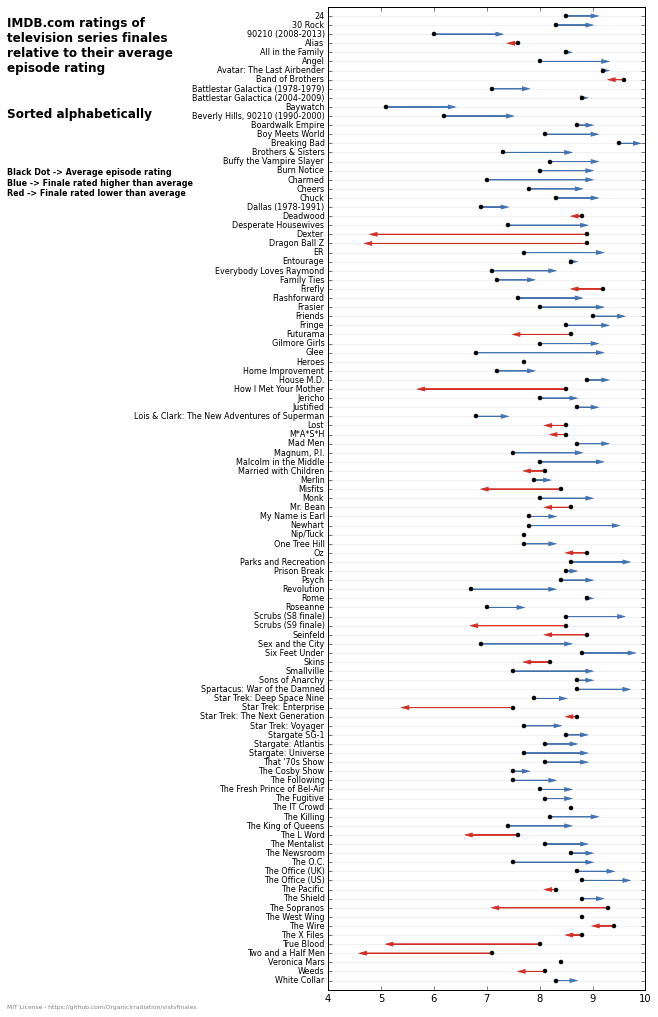

In [10]:
## Sort the data alphabetically
data_list = sorted(data_list, key=lambda k: k['name'])[::-1]
[fig, ax] = generate_plot(data_list)
fig.text(0.005, 0.90, 'Sorted alphabetically',
         fontsize=12, color='black', weight='bold', ha='left', va='top', alpha=1, transform=ax.transAxes)
plt.show()
fig.savefig('images/img_alphabetical.png', dpi=300)